# Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
DATA_DIR = "../../data/"

In [85]:
def compute_actual(total, pc):
    return total * pc / 100.0
v_compute_actual = np.vectorize(compute_actual)

data = pd.read_csv(DATA_DIR + "raw-data/exploratory.csv")

data["rtaxrev_pc"] = data["taxrev"] / data["pce"] / data["pop"]

data["property"] = v_compute_actual(data["taxrev"], data["p_property"])
data["rproperty_pc"] = data["property"] / data["pce"] / data["pop"]

data["sales"] = v_compute_actual(data["taxrev"], data["p_sales"])
data["rsales_pc"] = data["sales"] / data["pce"] / data["pop"]

data["individualincome"] = v_compute_actual(data["taxrev"], data["p_individualincome"])
data["rindividualincome_pc"] = data["individualincome"] / data["pce"] / data["pop"]

data["corporate"] = v_compute_actual(data["taxrev"], data["p_corporate"])
data["rcorporate_pc"] = data["corporate"] / data["pce"] / data["pop"]

data.head()

,year,taxrev,p_property,p_sales,p_individualincome,p_corporate,pop,pce,rtaxrev_pc,property,rproperty_pc,sales,rsales_pc,individualincome,rindividualincome_pc,corporate,rcorporate_pc
0,1965,167.022,15.884,22.762,31.669,16.399,194303000,18.330250,4.689492e-08,26.529774,7.448789e-09,38.017548,1.067422e-08,52.894197,1.485115e-08,27.389938,7.690298e-09
1,1966,186.065,15.456,21.161,32.366,17.257,196560000,18.741250,5.050926e-08,28.758206,7.806711e-09,39.373215,1.068826e-08,60.221798,1.634783e-08,32.109237,8.716383e-09
2,1967,208.577,14.523,20.027,32.309,17.355,198712000,19.314333,5.434538e-08,30.291638,7.892579e-09,41.771716,1.088375e-08,67.389143,1.755845e-08,36.198538,9.431640e-09
3,1968,218.623,14.676,20.660,34.798,14.263,200706000,20.147000,5.406611e-08,32.085111,7.934742e-09,45.167512,1.117006e-08,76.076432,1.881392e-08,31.182198,7.711449e-09
4,1969,261.468,13.646,19.254,36.793,15.244,202677000,21.086583,6.117977e-08,35.679923,8.348592e-09,50.343049,1.177955e-08,96.201921,2.250987e-08,39.858182,9.326245e-09


In [86]:
coincident = pd.read_csv(DATA_DIR + "raw-data/coincident/coincident-revised.csv")[["Date", "US"]]

In [87]:
coincident["year"] = coincident.index // 12 + 1979
coincident_averaged = coincident.groupby(["year"]).mean().reset_index()
coincident_averaged.head()

,year,US
0,1979,45.932500
1,1980,46.585000
2,1981,47.434167
3,1982,47.160000
4,1983,47.964167


In [88]:
data_merged = data.merge(coincident_averaged, on="year")
data_merged.head()

,year,taxrev,p_property,p_sales,p_individualincome,p_corporate,pop,pce,rtaxrev_pc,property,rproperty_pc,sales,rsales_pc,individualincome,rindividualincome_pc,corporate,rcorporate_pc,US
0,1979,662.519,11.050,17.432,38.362,11.847,225055000,37.402500,7.870622e-08,73.208349,8.697037e-09,115.490312,1.372007e-08,254.155539,3.019328e-08,78.488626,9.324326e-09,45.932500
1,1980,730.672,10.663,17.634,39.075,10.761,227225000,40.839917,7.873748e-08,77.911555,8.395777e-09,128.846700,1.388457e-08,285.510084,3.076667e-08,78.627614,8.472940e-09,46.585000
2,1981,832.930,10.187,18.651,39.784,9.122,229466000,44.418417,8.171976e-08,84.850579,8.324792e-09,155.349774,1.524155e-08,331.372871,3.251139e-08,75.979875,7.454477e-09,47.434167
3,1982,871.205,10.671,18.496,40.055,7.378,231664000,47.305667,7.949662e-08,92.966286,8.483084e-09,161.138077,1.470369e-08,348.961163,3.184237e-08,64.277505,5.865260e-09,47.160000
4,1983,872.628,11.291,19.152,39.441,5.878,233792000,49.727083,7.505965e-08,98.528427,8.474985e-09,167.125715,1.437542e-08,344.173209,2.960427e-08,51.293074,4.412006e-09,47.964167


In [106]:
data_merged.to_csv(DATA_DIR + "raw-data/merged.csv")

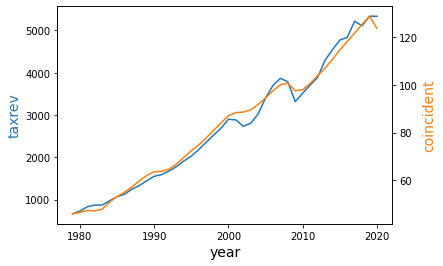

In [89]:
fig,ax = plt.subplots()
ax.plot(data_merged["year"], data_merged["taxrev"],color="tab:blue")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("taxrev",color="tab:blue",fontsize=14)

ax2=ax.twinx()
ax2.plot(data_merged["year"], data_merged["US"],color="tab:orange")
ax2.set_ylabel("coincident",color="tab:orange",fontsize=14)
plt.show()

In [90]:
data_merged_pct_chg = data_merged.set_index("year").pct_change().reset_index().dropna()
data_merged_pct_chg.head()

,year,taxrev,p_property,p_sales,p_individualincome,p_corporate,pop,pce,rtaxrev_pc,property,rproperty_pc,sales,rsales_pc,individualincome,rindividualincome_pc,corporate,rcorporate_pc,US
1,1980,0.102870,-0.035023,0.011588,0.018586,-0.091669,0.009642,0.091903,0.000397,0.064244,-0.034639,0.115649,0.011990,0.123368,0.018991,0.001771,-0.091308,0.014206
2,1981,0.139951,-0.044640,0.057673,0.018145,-0.152309,0.009862,0.087623,0.037876,0.089063,-0.008455,0.205695,0.097733,0.160635,0.056708,-0.033674,-0.120202,0.018228
3,1982,0.045952,0.047512,-0.008311,0.006812,-0.191186,0.009579,0.065001,-0.027204,0.095647,0.019015,0.037260,-0.035289,0.053077,-0.020578,-0.154019,-0.213190,-0.005780
4,1983,0.001633,0.058101,0.035467,-0.015329,-0.203307,0.009186,0.051187,-0.055813,0.059830,-0.000955,0.037158,-0.022326,-0.013721,-0.070287,-0.202006,-0.247773,0.017052
5,1984,0.115564,-0.036489,0.007310,-0.053346,0.288534,0.008696,0.041463,0.061916,0.074857,0.023168,0.123718,0.069679,0.056053,0.005268,0.437441,0.368315,0.061209


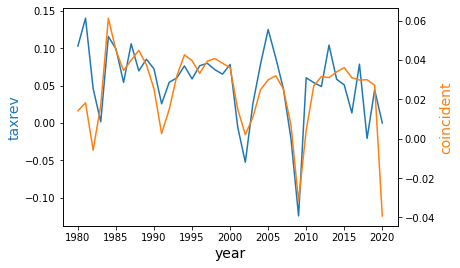

In [91]:
fig,ax = plt.subplots()
ax.plot(data_merged_pct_chg["year"], data_merged_pct_chg["taxrev"],color="tab:blue")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("taxrev",color="tab:blue",fontsize=14)

ax2=ax.twinx()
ax2.plot(data_merged_pct_chg["year"], data_merged_pct_chg["US"],color="tab:orange")
ax2.set_ylabel("coincident",color="tab:orange",fontsize=14)
plt.show()

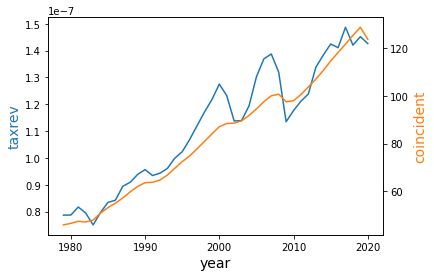

In [92]:
fig,ax = plt.subplots()
ax.plot(data_merged["year"], data_merged["rtaxrev_pc"],color="tab:blue")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("taxrev",color="tab:blue",fontsize=14)

ax2=ax.twinx()
ax2.plot(data_merged["year"], data_merged["US"],color="tab:orange")
ax2.set_ylabel("coincident",color="tab:orange",fontsize=14)
plt.show()

In [93]:
data_merged_pct_chg = data_merged.set_index("year").pct_change().reset_index().dropna()
data_merged_pct_chg.head()

,year,taxrev,p_property,p_sales,p_individualincome,p_corporate,pop,pce,rtaxrev_pc,property,rproperty_pc,sales,rsales_pc,individualincome,rindividualincome_pc,corporate,rcorporate_pc,US
1,1980,0.102870,-0.035023,0.011588,0.018586,-0.091669,0.009642,0.091903,0.000397,0.064244,-0.034639,0.115649,0.011990,0.123368,0.018991,0.001771,-0.091308,0.014206
2,1981,0.139951,-0.044640,0.057673,0.018145,-0.152309,0.009862,0.087623,0.037876,0.089063,-0.008455,0.205695,0.097733,0.160635,0.056708,-0.033674,-0.120202,0.018228
3,1982,0.045952,0.047512,-0.008311,0.006812,-0.191186,0.009579,0.065001,-0.027204,0.095647,0.019015,0.037260,-0.035289,0.053077,-0.020578,-0.154019,-0.213190,-0.005780
4,1983,0.001633,0.058101,0.035467,-0.015329,-0.203307,0.009186,0.051187,-0.055813,0.059830,-0.000955,0.037158,-0.022326,-0.013721,-0.070287,-0.202006,-0.247773,0.017052
5,1984,0.115564,-0.036489,0.007310,-0.053346,0.288534,0.008696,0.041463,0.061916,0.074857,0.023168,0.123718,0.069679,0.056053,0.005268,0.437441,0.368315,0.061209


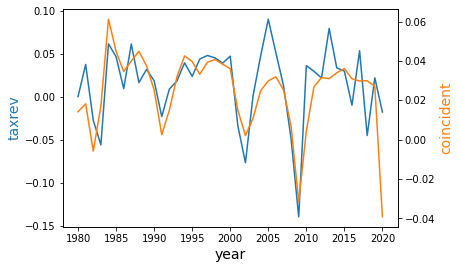

In [94]:
fig,ax = plt.subplots()
ax.plot(data_merged_pct_chg["year"], data_merged_pct_chg["rtaxrev_pc"],color="tab:blue", label="tax revenue")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("taxrev",color="tab:blue",fontsize=14)

ax2=ax.twinx()
ax2.plot(data_merged_pct_chg["year"], data_merged_pct_chg["US"],color="tab:orange", label="coincident")
ax2.set_ylabel("coincident",color="tab:orange",fontsize=14)
plt.show()

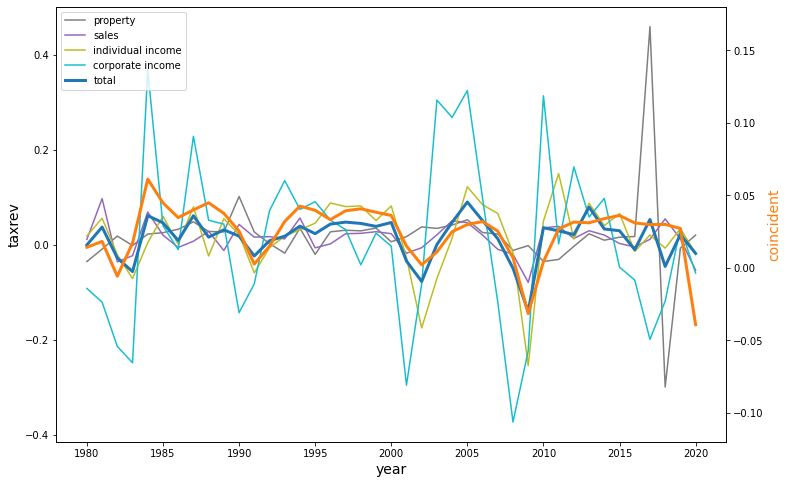

In [95]:
fig,ax = plt.subplots(figsize=(12, 8))

ax.plot(data_merged_pct_chg["year"], data_merged_pct_chg["rproperty_pc"],color="tab:grey", label="property")
ax.plot(data_merged_pct_chg["year"], data_merged_pct_chg["rsales_pc"],color="tab:purple", label="sales")
ax.plot(data_merged_pct_chg["year"], data_merged_pct_chg["rindividualincome_pc"],color="tab:olive", label="individual income")
ax.plot(data_merged_pct_chg["year"], data_merged_pct_chg["rcorporate_pc"],color="tab:cyan", label="corporate income")

ax.plot(data_merged_pct_chg["year"], data_merged_pct_chg["rtaxrev_pc"],color="tab:blue", label="total", linewidth=3)
ax.legend(loc="upper left")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("taxrev",fontsize=14)

ax2=ax.twinx()
ax2.plot(data_merged_pct_chg["year"], data_merged_pct_chg["US"],color="tab:orange", label="coincident", linewidth=3)
ax2.set_ylabel("coincident",color="tab:orange",fontsize=14)
ax2.set_ylim([-0.12, 0.18])
plt.show()

In [98]:
coincident = pd.read_csv(DATA_DIR + "raw-data/coincident/coincident-revised.csv")[["Date", "US"]]
coincident["year"] = coincident.index // 12 + 1979
coincident["month"] = coincident.index % 12 // 3 * 3 + 1
coincident

,Date,US,year,month
0,Jan-79,45.15,1979,1
1,Feb-79,45.30,1979,1
2,Mar-79,45.54,1979,1
3,Apr-79,45.61,1979,4
4,May-79,45.84,1979,4
...,...,...,...,...
511,Aug-21,129.56,2021,7
512,Sep-21,130.30,2021,7
513,Oct-21,130.85,2021,10
514,Nov-21,131.37,2021,10


In [99]:
coincident_averaged = coincident.groupby(["year", "month"]).mean().reset_index()
coincident_averaged

,year,month,US
0,1979,1,45.330000
1,1979,4,45.806667
2,1979,7,46.160000
3,1979,10,46.433333
4,1980,1,46.646667
...,...,...,...
167,2020,10,124.176667
168,2021,1,125.533333
169,2021,4,127.216667
170,2021,7,129.600000


In [100]:
# data_quarterly = pd.read_csv(DATA_DIR + "raw-data/cb-tax/unadjusted - x13test.csv").dropna()
# data_quarterly["Period"] = data_quarterly["Period"].map(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d'))
# data_quarterly["year"] = data_quarterly["Period"].map(lambda x: x.year)
# data_quarterly["month"] = data_quarterly["Period"].map(lambda x: x.month)
# data_quarterly

In [101]:
data_quarterly = pd.read_csv(DATA_DIR + "raw-data/cb-tax/adjusted.csv").dropna()
data_quarterly["Period"] = data_quarterly["Period"].map(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d'))
data_quarterly["year"] = data_quarterly["Period"].map(lambda x: x.year)
data_quarterly["month"] = data_quarterly["Period"].map(lambda x: x.month)
data_quarterly.head()

,Period,Value,pce,year,month
68,2009-01-01,265264.0,94.674667,2009,1
69,2009-04-01,256373.0,95.046000,2009,4
70,2009-07-01,261553.0,95.382667,2009,7
71,2009-10-01,264098.0,95.977000,2009,10
72,2010-01-01,263472.0,96.305000,2010,1


In [102]:
data_quarterly_merged = data_quarterly.merge(data[["year", "pop"]], on="year")
data_quarterly_merged = data_quarterly_merged.merge(coincident_averaged, on=["year", "month"])
data_quarterly_merged["taxrevpc"] = data_quarterly_merged["Value"] / data_quarterly_merged["pce"] / data_quarterly_merged["pop"]
data_quarterly_merged

,Period,Value,pce,year,month,pop,US,taxrevpc
0,2009-01-01,265264.0,94.674667,2009,1,306771529,98.736667,0.000009
1,2009-04-01,256373.0,95.046000,2009,4,306771529,97.513333,0.000009
2,2009-07-01,261553.0,95.382667,2009,7,306771529,96.990000,0.000009
3,2009-10-01,264098.0,95.977000,2009,10,306771529,96.810000,0.000009
4,2010-01-01,263472.0,96.305000,2010,1,309327143,97.023333,0.000009
5,2010-04-01,263625.0,96.565000,2010,4,309327143,97.693333,0.000009
6,2010-07-01,270280.0,96.713333,2010,7,309327143,98.223333,0.000009
7,2010-10-01,267287.0,97.018667,2010,10,309327143,98.783333,0.000009
8,2011-01-01,277615.0,97.445333,2011,1,311583481,99.490000,0.000009
9,2011-04-01,279802.0,98.015000,2011,4,311583481,100.213333,0.000009


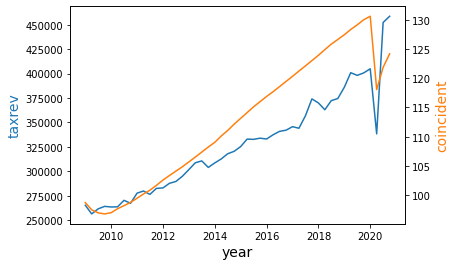

In [103]:
fig,ax = plt.subplots()
ax.plot(data_quarterly_merged["Period"], data_quarterly_merged["Value"],color="tab:blue")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("taxrev",color="tab:blue",fontsize=14)

ax2=ax.twinx()
ax2.plot(data_quarterly_merged["Period"], data_quarterly_merged["US"],color="tab:orange")
ax2.set_ylabel("coincident",color="tab:orange",fontsize=14)
plt.show()

In [104]:
data_quarterly_merged_pct_chg = data_quarterly_merged.set_index("Period").pct_change().reset_index().dropna()
data_quarterly_merged_pct_chg.head()

,Period,Value,pce,year,month,pop,US,taxrevpc
1,2009-04-01,-0.033518,0.003922,0.000000,3.000000,0.000000,-0.012390,-0.037293
2,2009-07-01,0.020205,0.003542,0.000000,0.750000,0.000000,-0.005367,0.016604
3,2009-10-01,0.009730,0.006231,0.000000,0.428571,0.000000,-0.001856,0.003478
4,2010-01-01,-0.002370,0.003417,0.000498,-0.900000,0.008331,0.002204,-0.013982
5,2010-04-01,0.000581,0.002700,0.000000,3.000000,0.000000,0.006906,-0.002113


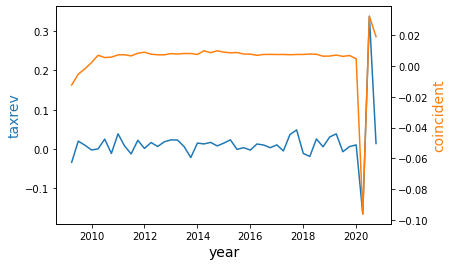

In [105]:
fig,ax = plt.subplots()
ax.plot(data_quarterly_merged_pct_chg["Period"], data_quarterly_merged_pct_chg["Value"],color="tab:blue")
ax.set_xlabel("year",fontsize=14)
ax.set_ylabel("taxrev",color="tab:blue",fontsize=14)

ax2=ax.twinx()
ax2.plot(data_quarterly_merged_pct_chg["Period"], data_quarterly_merged_pct_chg["US"],color="tab:orange")
ax2.set_ylabel("coincident",color="tab:orange",fontsize=14)
plt.show()